# The Compliment Machine
Create a state machine that once a user passes in a name, state machine outputs a compliment.
The machine should prompt the user for their name, and then output the compliment:
"\<user-name\>, you're doing an amazing job learning LangGraph!"

In [14]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [15]:
# Define the state object
class AgentState(TypedDict):
    message: str

In [16]:
# Name collection node
def enter_name_node(state: AgentState) -> AgentState:
    """
    This node prompts user to enter user name and saves it in the state
    """
    state['message'] = input("Please enter your name")
    return state

In [17]:
# Compliment node
def compliment_node(state: AgentState) -> AgentState:
    """
    This node generates a compliments for the user
    """
    state['message'] = f"{state['message']}, you're doing an amazing job learning LangGraph!"
    return state

In [18]:
# Printer node
def print_compliment_node(state: AgentState) -> AgentState:
    """
    This node prints out the compliment
    """
    print(state['message'])
    return state

In [19]:
# Set the graph
graph = StateGraph(AgentState)
# Nodes
graph.add_node("name_collector", enter_name_node)
graph.add_node("complimenter", compliment_node)
graph.add_node("printer", print_compliment_node)
# Edges - This part is more advanced than what's been shown. Including as a challenge
graph.add_edge("name_collector", "complimenter")
graph.add_edge("complimenter", "printer")
# Define entry and exit
graph.set_entry_point("name_collector")
graph.set_finish_point("printer")
app = graph.compile()

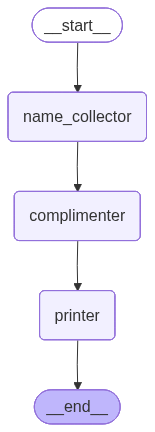

In [20]:
# Visualise the graph
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
result = app.invoke({"message": ""})

Ata, you're doing an amazing job learning LangGraph!
